# Visualizacion

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representaciones-en-los-mismos-ejes" data-toc-modified-id="Representaciones-en-los-mismos-ejes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representaciones en los mismos ejes</a></span></li><li><span><a href="#Representaciones-en-distintos-ejes" data-toc-modified-id="Representaciones-en-distintos-ejes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Representaciones en distintos ejes</a></span><ul class="toc-item"><li><span><a href="#Subplots" data-toc-modified-id="Subplots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Subplots</a></span></li></ul></li><li><span><a href="#Axes" data-toc-modified-id="Axes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Axes</a></span></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Referencias</a></span></li><li><span><a href="#Ejercicios" data-toc-modified-id="Ejercicios-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ejercicios</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-1" data-toc-modified-id="Ejercicio-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ejercicio 1</a></span></li><li><span><a href="#Ejercicio-2" data-toc-modified-id="Ejercicio-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ejercicio 2</a></span></li><li><span><a href="#Ejercicio-3" data-toc-modified-id="Ejercicio-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Ejercicio 3</a></span></li></ul></li></ul></div>

---
# Matplotlib - Gráficos multiples

In [6]:
from matplotlib import pyplot as plt
import pandas as pd

## Representaciones en distintos ejes

### Subplots

La manera más sencilla de integrar diferentes representaciones en la misma figura es definir una matriz de subplots. Se definen subplots en una matriz comun y se recorren por filas y columnas

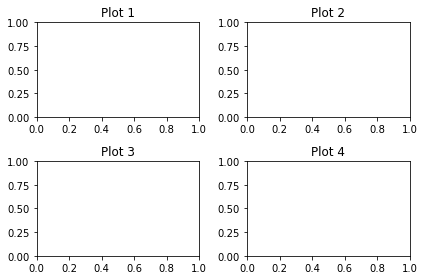

In [22]:
plt.subplot(2,2,1)
plt.title("Plot 1")

plt.subplot(2,2,2)
plt.title("Plot 2")

plt.subplot(2,2,3)
plt.title("Plot 3")

plt.subplot(2,2,4)
plt.title("Plot 4")

#plt.tight_layout(5, 5)
plt.tight_layout(pad=1.08)


In [24]:
path = "/home/bigdatafutura/Sesion 03/files/dow_jones_index.data"
data = pd.read_csv(path)

data = data[data["stock"]=="AA"]

columns = ["stock", "date", "high", "low", "open", "close"]

data = data[columns]

data[["high", "low", "open", "close"]] = data[["high", "low", "open", "close"]].applymap(lambda x: x.replace("$", "")).astype("float")

data["date"] = pd.to_datetime(data["date"], format="%m/%d/%Y")

Para incluir gráficos vamos añadiendo representaciones cuando tras activar cada subplot

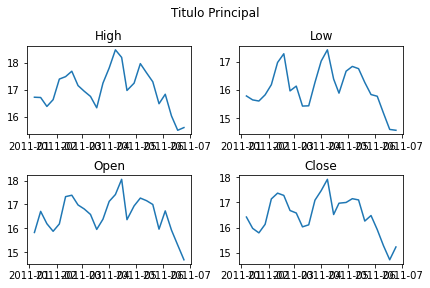

In [31]:
plt.suptitle("Titulo Principal")

plt.subplot(2,2,1)
plt.title("High")
plt.plot(data["date"], data["high"])

plt.subplot(2,2,2)
plt.title("Low")
plt.plot(data["date"], data["low"])

plt.subplot(2,2,3)
plt.title("Open")
plt.plot(data["date"], data["open"])

plt.subplot(2,2,4)
plt.title("Close")
plt.plot(data["date"], data["close"])

#plt.tight_layout()

plt.tight_layout(pad=0.8)

plt.show()

Cada subplot, devuelve el objeto de la clase `axes` que ha creado. Podemos explorarlo como un objeto python. 

Ahora también haremos un gráfico más grande y con un titulo superior

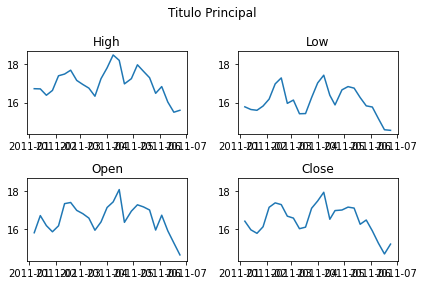

In [32]:
plt.suptitle("Titulo Principal")

axes = plt.subplot(2,2,1)
plt.title("High")
plt.plot(data["date"], data["high"])

plt.subplot(2,2,2, sharey=axes)
plt.title("Low")
plt.plot(data["date"], data["low"])

plt.subplot(2,2,3, sharey=axes)
plt.title("Open")
plt.plot(data["date"], data["open"])

plt.subplot(2,2,4, sharey=axes)
plt.title("Close")
plt.plot(data["date"], data["close"])

plt.tight_layout()

plt.show()

## Axes

Cuando se crea un grafico se establecen sus axes. Si no se indica nada, por defecto se situan en: 
- xlo = 0
- ylo = 0
- width = 1
- high = 1

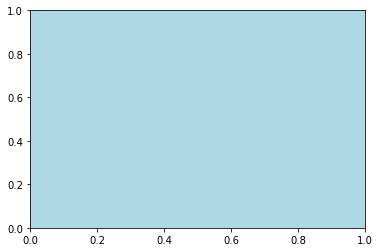

In [33]:
axes = plt.axes(facecolor="lightblue")

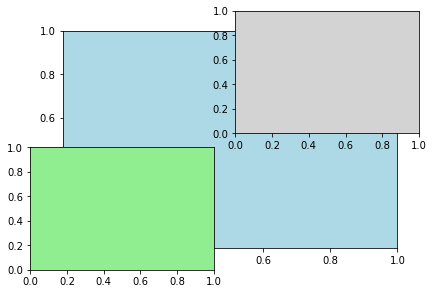

In [34]:
plt.axes(facecolor="lightblue")
plt.axes([0.05, 0.05, 0.425, 0.425], facecolor="lightgreen")
plt.axes([0.525, 0.525, 0.425, 0.425], facecolor="lightgrey")

plt.show()

Pero en la misma figura se pueden crear varias, hasta que se ejecuta plt.show(). Las coordenadas son relativas entre sí, si solo hay un axe xlo y ylo se fijan en 0.

Al igual que en subplots, se crean las representaciones conforme se crean los axes.

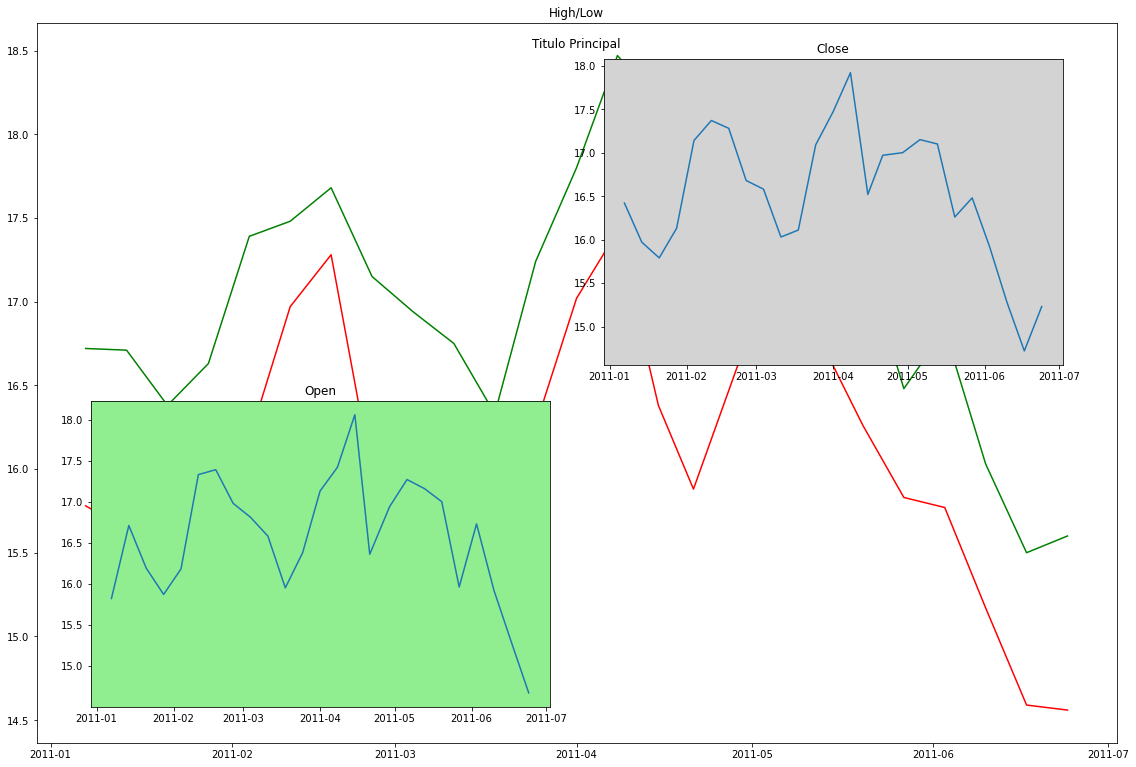

In [35]:
plt.figure(figsize=(15,10))

plt.suptitle("Titulo Principal")

plt.axes([0,0,1,1])
plt.title("High/Low")
plt.plot(data["date"], data["low"], c="red")
plt.plot(data["date"], data["high"], c="green")

plt.axes([0.05, 0.05, 0.425, 0.425], facecolor="lightgreen")
plt.title("Open")
plt.plot(data["date"], data["open"])

plt.axes([0.525, 0.525, 0.425, 0.425], facecolor="lightgrey")
plt.title("Close")
plt.plot(data["date"], data["close"])

plt.show()

## Referencias
Tight Layout:
- https://matplotlib.org/users/tight_layout_guide.html

Axes:
- https://matplotlib.org/api/axes_api.html
- https://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.axes

## Ejercicios

### Ejercicio

##### Reproduce la figura del cuarteto de Anscombe. 
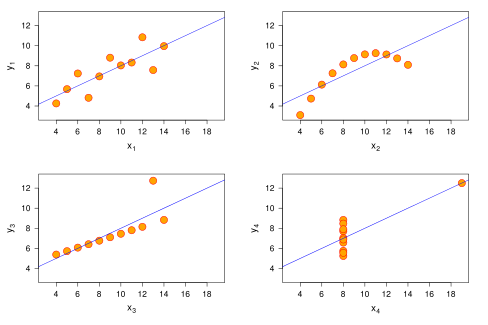

In [44]:
import numpy as np
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

def fit(x):
    return 3 + 0.5 * x

In [45]:
serie1=fit(x)
serie1

array([ 8. ,  7. ,  9.5,  7.5,  8.5, 10. ,  6. ,  5. ,  9. ,  6.5,  5.5])

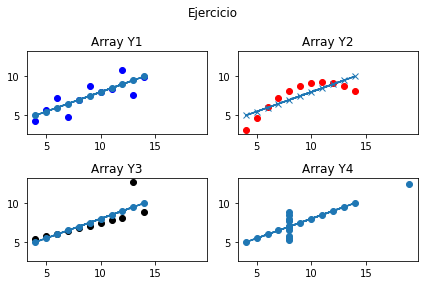

In [46]:
plt.suptitle("Ejercicio")

ax1 = plt.subplot(2,2,1)
plt.title("Array Y1")
plt.scatter(x, y1,c="blue")
plt.plot(x, serie1, "o-")

plt.subplot(2,2,2, sharex=ax1, sharey=ax1)
plt.title("Array Y2")
plt.scatter(x, y2,c="red")
plt.plot(x, serie1, "x-")

plt.subplot(2,2,3, sharex=ax1, sharey=ax1)
plt.title("Array Y3")
plt.scatter(x, y3, c="black")
plt.plot(x, serie1, "o-")

plt.subplot(2,2,4, sharex=ax1, sharey=ax1)
plt.title("Array Y4")
plt.scatter(x4, y4)
plt.plot(x, serie1, "o-")

plt.tight_layout()

plt.show()


In [47]:
plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add a subplot to the current figure.

Wrapper of `.Figure.add_subplot` with a difference in behavior
explained in the notes section.

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - A 3-digit integer. The digits are interpreted as if given separately
 

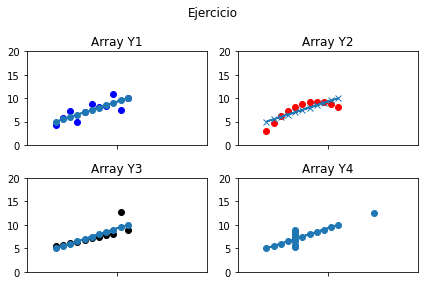

In [48]:
plt.suptitle("Ejercicio")

ax1 = plt.subplot(2,2,1)
plt.title("Array Y1")
plt.scatter(x, y1,c="blue")
plt.plot(x, serie1, "o-")
# ax1.set_xticklabels([])
ax1.set_xlim([0,25])
ax1.set_ylim([0, 20])
ax1.set_xticks([12.5])
ax1.set_xticklabels([])

ax2 = plt.subplot(2,2,2)
plt.title("Array Y2")
plt.scatter(x, y2,c="red")
plt.plot(x, serie1, "x-")
ax2.set_xlim([0,25])
ax2.set_ylim([0, 20])
ax2.set_xticks([12.5])
ax2.set_xticklabels([])

ax3 = plt.subplot(2,2,3)
plt.title("Array Y3")
plt.scatter(x, y3, c="black")
plt.plot(x, serie1, "o-")
ax3.set_xlim([0,25])
ax3.set_ylim([0, 20])
ax3.set_xticks([12.5])
ax3.set_xticklabels([])

ax4 = plt.subplot(2,2,4)
plt.title("Array Y4")
plt.scatter(x4, y4)
plt.plot(x, serie1, "o-")
ax4.set_xlim([0,25])
ax4.set_ylim([0, 20])
ax4.set_xticks([12.5])
ax4.set_xticklabels([])

plt.tight_layout()

plt.show()
